In [2]:
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
# load in data set
df = pd.read_csv('./data/kc_house_data.csv')

In [4]:
# initially inspect the data
df['condition'].head()

0      Average
1      Average
2      Average
3    Very Good
4      Average
Name: condition, dtype: object

In [5]:
df['condition'] = df['condition'].replace("Very Good","Very_Good")

In [6]:
# determine where nulls are in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

It appears that we only have two columns that contain null values: waterfront and yr_renovated.

In [7]:
df.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [8]:
df.dropna(subset=['waterfront', 'view'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19164 non-null  int64  
 1   date           19164 non-null  object 
 2   price          19164 non-null  float64
 3   bedrooms       19164 non-null  int64  
 4   bathrooms      19164 non-null  float64
 5   sqft_living    19164 non-null  int64  
 6   sqft_lot       19164 non-null  int64  
 7   floors         19164 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           19164 non-null  object 
 10  condition      19164 non-null  object 
 11  grade          19164 non-null  object 
 12  sqft_above     19164 non-null  int64  
 13  sqft_basement  19164 non-null  object 
 14  yr_built       19164 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        19164 non-null  int64  
 17  lat            19164 non-null  float64
 18  long  

In [10]:
df.yr_renovated.value_counts()

0.0       15111
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

Based on the above value counts, we will drop the yr_renovated column.

In [11]:
df.drop(columns='yr_renovated', axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19164 non-null  int64  
 1   date           19164 non-null  object 
 2   price          19164 non-null  float64
 3   bedrooms       19164 non-null  int64  
 4   bathrooms      19164 non-null  float64
 5   sqft_living    19164 non-null  int64  
 6   sqft_lot       19164 non-null  int64  
 7   floors         19164 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           19164 non-null  object 
 10  condition      19164 non-null  object 
 11  grade          19164 non-null  object 
 12  sqft_above     19164 non-null  int64  
 13  sqft_basement  19164 non-null  object 
 14  yr_built       19164 non-null  int64  
 15  zipcode        19164 non-null  int64  
 16  lat            19164 non-null  float64
 17  long           19164 non-null  float64
 18  sqft_l

In [13]:
df.zipcode.value_counts()

98103    539
98038    525
98115    513
98052    506
98117    495
        ... 
98102     89
98010     87
98024     72
98148     51
98039     45
Name: zipcode, Length: 70, dtype: int64

In [14]:
df_seattle = df[(df['zipcode'] >= 98101) & (df['zipcode'] <= 98199)]

In [15]:
df_seattle.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very_Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,1960,98146,47.5123,-122.337,1780,8113
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,Good,7 Average,860,300.0,1942,98115,47.6900,-122.292,1330,6000
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,Average,7 Average,1810,0.0,1900,98107,47.6700,-122.394,1360,4850


In [16]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7949 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7949 non-null   int64  
 1   date           7949 non-null   object 
 2   price          7949 non-null   float64
 3   bedrooms       7949 non-null   int64  
 4   bathrooms      7949 non-null   float64
 5   sqft_living    7949 non-null   int64  
 6   sqft_lot       7949 non-null   int64  
 7   floors         7949 non-null   float64
 8   waterfront     7949 non-null   object 
 9   view           7949 non-null   object 
 10  condition      7949 non-null   object 
 11  grade          7949 non-null   object 
 12  sqft_above     7949 non-null   int64  
 13  sqft_basement  7949 non-null   object 
 14  yr_built       7949 non-null   int64  
 15  zipcode        7949 non-null   int64  
 16  lat            7949 non-null   float64
 17  long           7949 non-null   float64
 18  sqft_li

<AxesSubplot:>

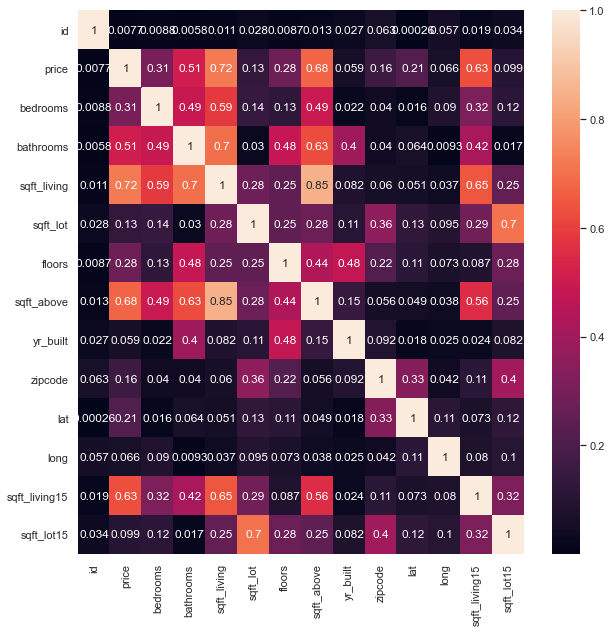

In [17]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(abs(df_seattle.corr()), annot=True)

# Create First Simple Model

In [18]:
# create test train split for data
from sklearn.model_selection import train_test_split

In [19]:
X = df_seattle
y = df_seattle['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [21]:
print(X_train.shape, X_test.shape)

(5961, 20) (1988, 20)


In [22]:
slr = LinearRegression()
slr_fit = slr.fit(np.array(X_train['sqft_living']).reshape(-1, 1), np.array(y_train).reshape(-1,1))
slr_fit.score(np.array(X_test['sqft_living']).reshape(-1,1), np.array(y_test).reshape(-1,1))

0.47687019655645235

# Feature Engineering

In [23]:
# (1) Create a variable condition_qu_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
condition_X_train = X_train[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(condition_X_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very_Good'], dtype=object)]

In [24]:
trans_condition_X_train = ohe.transform(condition_X_train)

In [25]:
# (5a) Make the transformed data into a dataframe
encoded_X_train = pd.DataFrame(
    # Pass in NumPy array
    trans_condition_X_train,
    # Set the column names to the categories found by OHE
    columns='Cond_' + ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
encoded_X_train

,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very_Good
17430,1.0,0.0,0.0,0.0,0.0
2722,1.0,0.0,0.0,0.0,0.0
9563,1.0,0.0,0.0,0.0,0.0
625,0.0,0.0,1.0,0.0,0.0
2097,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
5961,0.0,0.0,1.0,0.0,0.0
6606,1.0,0.0,0.0,0.0,0.0
5519,0.0,0.0,1.0,0.0,0.0
3731,0.0,0.0,0.0,0.0,1.0


In [26]:
# add our encoded condition columns to our df_seattle dataframe
df_seattle1 = pd.concat([X_train, encoded_X_train], axis=1)
df_seattle1.drop(columns='condition', axis=1, inplace=True)
df_seattle1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very_Good
17430,1959703070,10/29/2014,979700.0,5,3.0,3730,5500,1.5,NO,NONE,...,98102,47.6507,-122.320,1890,5500,1.0,0.0,0.0,0.0,0.0
2722,2770601741,11/6/2014,390000.0,3,3.0,1490,2944,2.0,NO,NONE,...,98199,47.6506,-122.384,1590,1600,1.0,0.0,0.0,0.0,0.0
9563,5589300205,8/5/2014,274000.0,5,1.0,1680,9383,1.0,NO,NONE,...,98155,47.7523,-122.311,1680,9458,1.0,0.0,0.0,0.0,0.0
625,7812800565,8/14/2014,289500.0,3,1.0,960,6400,1.0,NO,NONE,...,98178,47.4960,-122.239,1200,6600,0.0,0.0,1.0,0.0,0.0
2097,6414100111,11/5/2014,365000.0,2,1.0,990,9223,1.0,NO,NONE,...,98125,47.7200,-122.320,1230,7244,1.0,0.0,0.0,0.0,0.0


In [27]:
grade_X_train = X_train[["grade"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(grade_X_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion', '4 Low',
        '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better'],
       dtype=object)]

In [28]:
trans_grade_X_train = ohe.transform(grade_X_train)

In [29]:
graded_X_train = pd.DataFrame(

    trans_grade_X_train,

    columns= 'grade' + ohe.categories_[0],

    index=X_train.index
)

In [30]:
graded_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961 entries, 17430 to 12433
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   grade10 Very Good   5961 non-null   float64
 1   grade11 Excellent   5961 non-null   float64
 2   grade12 Luxury      5961 non-null   float64
 3   grade13 Mansion     5961 non-null   float64
 4   grade4 Low          5961 non-null   float64
 5   grade5 Fair         5961 non-null   float64
 6   grade6 Low Average  5961 non-null   float64
 7   grade7 Average      5961 non-null   float64
 8   grade8 Good         5961 non-null   float64
 9   grade9 Better       5961 non-null   float64
dtypes: float64(10)
memory usage: 512.3 KB


In [31]:
# (1) Create a variable condition_qu_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
view_X_train = X_train[["view"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(view_X_train)

# Inspect the categories of the fitted encoder
ohe.categories_

trans_view_X_train = ohe.transform(view_X_train)

# (5a) Make the transformed data into a dataframe
encoded_X_train_view = pd.DataFrame(
    # Pass in NumPy array
    trans_view_X_train,
    # Set the column names to the categories found by OHE
    columns='View_' + ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
encoded_X_train_view

,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
17430,0.0,0.0,0.0,0.0,1.0
2722,0.0,0.0,0.0,0.0,1.0
9563,0.0,0.0,0.0,0.0,1.0
625,0.0,0.0,0.0,0.0,1.0
2097,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
5961,1.0,0.0,0.0,0.0,0.0
6606,0.0,0.0,0.0,0.0,1.0
5519,0.0,0.0,0.0,0.0,1.0
3731,0.0,0.0,0.0,0.0,1.0


In [32]:
# add our encoded condition columns to our df_seattle dataframe
df_seattle2 = pd.concat([df_seattle1, encoded_X_train_view], axis=1)
df_seattle2.drop(columns='view', axis=1, inplace=True)
df_seattle2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very_Good,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
17430,1959703070,10/29/2014,979700.0,5,3.0,3730,5500,1.5,NO,7 Average,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2722,2770601741,11/6/2014,390000.0,3,3.0,1490,2944,2.0,NO,7 Average,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9563,5589300205,8/5/2014,274000.0,5,1.0,1680,9383,1.0,NO,7 Average,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
625,7812800565,8/14/2014,289500.0,3,1.0,960,6400,1.0,NO,6 Low Average,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097,6414100111,11/5/2014,365000.0,2,1.0,990,9223,1.0,NO,7 Average,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
df_seattle2.waterfront.value_counts()

NO     5914
YES      47
Name: waterfront, dtype: int64

In [34]:
# (0) import OrdinalEncoder from sklearn.preprocessing

# (1) Create a variable street_train that contains the
# relevant column from X_train
# (Use double brackets [[]] to get the appropriate shape)
waterfront_train = X_train[['waterfront']]

# (2) Instantiate an OrdinalEncoder
encoder_waterfront = OrdinalEncoder()

# (3) Fit the encoder on street_train
encoder_waterfront.fit(waterfront_train)

# Inspect the categories of the fitted encoder
encoder_waterfront.categories_[0]



array(['NO', 'YES'], dtype=object)

In [35]:
# (4) Transform street_train using the encoder and
# assign the result to street_encoded_train
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)

# Flatten for appropriate shape
waterfront_encoded_train = waterfront_encoded_train.flatten()

# Visually inspect street_encoded_train
waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
# (5) Replace value of Street
df_seattle2["waterfront"] = waterfront_encoded_train

# Visually inspect X_train
df_seattle2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very_Good,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
17430,1959703070,10/29/2014,979700.0,5,3.0,3730,5500,1.5,0.0,7 Average,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2722,2770601741,11/6/2014,390000.0,3,3.0,1490,2944,2.0,0.0,7 Average,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9563,5589300205,8/5/2014,274000.0,5,1.0,1680,9383,1.0,0.0,7 Average,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
625,7812800565,8/14/2014,289500.0,3,1.0,960,6400,1.0,0.0,6 Low Average,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097,6414100111,11/5/2014,365000.0,2,1.0,990,9223,1.0,0.0,7 Average,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
df_seattle3 = pd.concat([df_seattle2, graded_X_train], axis=1)
df_seattle3.drop(columns='grade', axis=1, inplace=True)
df_seattle3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade7 Average,grade8 Good,grade9 Better
17430,1959703070,10/29/2014,979700.0,5,3.0,3730,5500,1.5,0.0,2160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2722,2770601741,11/6/2014,390000.0,3,3.0,1490,2944,2.0,0.0,960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9563,5589300205,8/5/2014,274000.0,5,1.0,1680,9383,1.0,0.0,1400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
625,7812800565,8/14/2014,289500.0,3,1.0,960,6400,1.0,0.0,820,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2097,6414100111,11/5/2014,365000.0,2,1.0,990,9223,1.0,0.0,990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
df_seattle3.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'Cond_Average', 'Cond_Fair', 'Cond_Good', 'Cond_Poor', 'Cond_Very_Good',
       'View_AVERAGE', 'View_EXCELLENT', 'View_FAIR', 'View_GOOD', 'View_NONE',
       'grade10 Very Good', 'grade11 Excellent', 'grade12 Luxury',
       'grade13 Mansion', 'grade4 Low', 'grade5 Fair', 'grade6 Low Average',
       'grade7 Average', 'grade8 Good', 'grade9 Better'],
      dtype='object')

In [39]:
seattle_final = df_seattle3.drop(columns=['grade7 Average','Cond_Average', 'View_AVERAGE'], axis=1)
seattle_final.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,View_NONE,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade8 Good,grade9 Better
17430,1959703070,10/29/2014,979700.0,5,3.0,3730,5500,1.5,0.0,2160,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2722,2770601741,11/6/2014,390000.0,3,3.0,1490,2944,2.0,0.0,960,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9563,5589300205,8/5/2014,274000.0,5,1.0,1680,9383,1.0,0.0,1400,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
625,7812800565,8/14/2014,289500.0,3,1.0,960,6400,1.0,0.0,820,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2097,6414100111,11/5/2014,365000.0,2,1.0,990,9223,1.0,0.0,990,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## John's work

We wanted to check if the quality of the houses themselves had any affect on the prices of the house so we ran a multiregression formula to show us how they correspond.

In [40]:
# created a seperate variables just looking at categories that deal with quality of housing
df_quality = seattle_final.drop(columns=['id', 'date', 'waterfront', 'View_EXCELLENT', 'View_FAIR', 'View_GOOD', 'View_NONE', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement','sqft_lot15', 'sqft_above', 'lat', 'long', 'sqft_living15', 'yr_built', 'zipcode'], axis=1)

In [41]:
df_quality.head()

,price,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very_Good,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade8 Good,grade9 Better
17430,979700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2722,390000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9563,274000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
625,289500.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2097,365000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
xquality = df_quality.drop('price', axis = 1)
yquality = df_quality['price']

In [43]:
#created a multiregression to show the relation between all the chosen variables and price.
quality = sm.OLS(yquality, xquality).fit()
quality.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.747
Method:                 Least Squares   F-statistic:                              1352.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):                        0.00
Time:                        10:37:12   Log-Likelihood:                         -84093.
No. Observations:                5961   AIC:                                  1.682e+05
Df Residuals:                    5948   BIC:                                  1.683e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cond_Fair           2.142e+05   4.59e+04      4.665      0.000    1.24e+05    3.04e+05
Cond_Good           3.456e+05   9070.750     38.096      0.000    3.28e+05    3.63e+05
Cond_Poor            2.08e+05   1.03e+05      2.010      0.044    5138.807    4.11e+05
Cond_Very_Good      4.173e+05   1.32e+04     31.673      0.000    3.91e+05    4.43e+05
grade10 Very Good   1.276e+06    2.7e+04     47.196      0.000    1.22e+06    1.33e+06
grade11 Excellent   1.798e+06   5.07e+04     35.441      0.000     1.7e+06     1.9e+06
grade12 Luxury      2.028e+06   1.03e+05     19.763      0.000    1.83e+06    2.23e+06
grade13 Mansion     3.691e+06   1.32e+05     27.878      0.000    3.43e+06    3.95e+06
grade4 Low           1.12e+05   1.33e+05      0.844      0.398   -1.48e+05    3.72e+05
grade5 Fair         1.567e+05    4.3e+04      3.639      0.000    7.23e+04    2.41e+05
grade6 Low Average  1.611e+05   1.14e+04     14.161      0.000    1.39e+05    1.83e+05
grade8 Good          4.92e+05   8619.422     57.080      0.000    4.75e+05    5.09e+05
grade9 Better       8.365e+05   1.53e+04     54.770      0.000    8.07e+05    8.66e+05
==============================================================================
Omnibus:                      894.380   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6503.735
Skew:                           0.512   Prob(JB):                         0.00
Kurtosis:                       8.014   Cond. No.                         17.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We found that you can see a really good trend with higher grade is higher price of housing, and the better the condition the higher the price as well.

In [44]:
#checked for correlation between the x variables and price
df_quality.corr()

,price,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very_Good,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade8 Good,grade9 Better
price,1.000000,-0.055018,0.035988,-0.025458,0.136545,0.380857,0.328924,0.193749,0.288467,-0.035148,-0.072618,-0.269107,0.090877,0.337554
Cond_Fair,-0.055018,1.000000,-0.052403,-0.003808,-0.032301,-0.002844,-0.007731,-0.003808,-0.002949,0.054493,0.046461,0.088602,-0.054059,-0.026926
Cond_Good,0.035988,-0.052403,1.000000,-0.023124,-0.196154,-0.033089,-0.004257,0.015192,-0.005544,-0.017906,-0.011986,0.045506,-0.077584,-0.033028
Cond_Poor,-0.025458,-0.003808,-0.023124,1.000000,-0.014254,-0.006473,-0.003411,-0.001680,-0.001301,-0.001301,0.121220,0.028738,-0.023855,-0.011882
Cond_Very_Good,0.136545,-0.032301,-0.196154,-0.014254,1.000000,0.018812,0.010321,-0.001040,-0.011037,-0.011037,-0.006921,-0.000494,-0.030682,0.004379
grade10 Very Good,0.380857,-0.002844,-0.033089,-0.006473,0.018812,1.000000,-0.013140,-0.006473,-0.005012,-0.005012,-0.015651,-0.066280,-0.091885,-0.045767
grade11 Excellent,0.328924,-0.007731,-0.004257,-0.003411,0.010321,-0.013140,1.000000,-0.003411,-0.002642,-0.002642,-0.008249,-0.034933,-0.048429,-0.024122
grade12 Luxury,0.193749,-0.003808,0.015192,-0.001680,-0.001040,-0.006473,-0.003411,1.000000,-0.001301,-0.001301,-0.004063,-0.017207,-0.023855,-0.011882
grade13 Mansion,0.288467,-0.002949,-0.005544,-0.001301,-0.011037,-0.005012,-0.002642,-0.001301,1.000000,-0.001008,-0.003146,-0.013324,-0.018472,-0.009201
grade4 Low,-0.035148,0.054493,-0.017906,-0.001301,-0.011037,-0.005012,-0.002642,-0.001301,-0.001008,1.000000,-0.003146,-0.013324,-0.018472,-0.009201


with this correlation matrix we can see that good grades and conditions lead to higher correlation with price and vice versa for poor conditions and grades. the highest correlated value is when a grade is excellent.

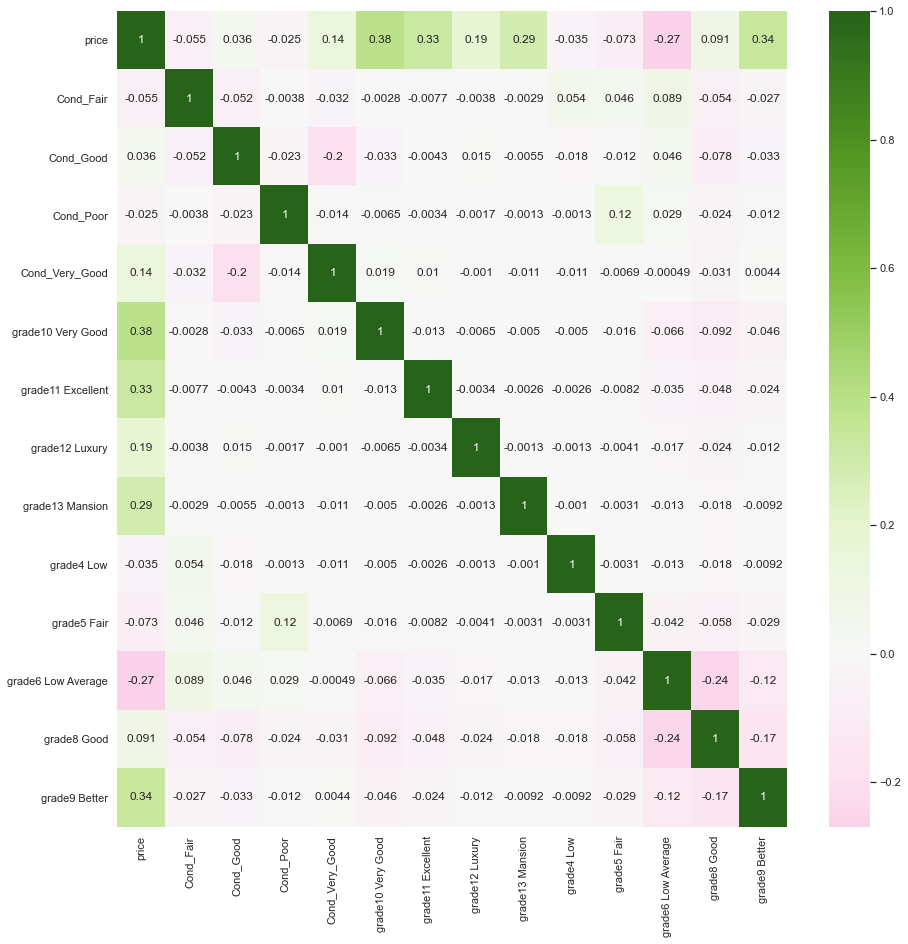

In [58]:
#heat map of the correlations
sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(df_quality.corr(), annot = True, cmap="PiYG", center=0);

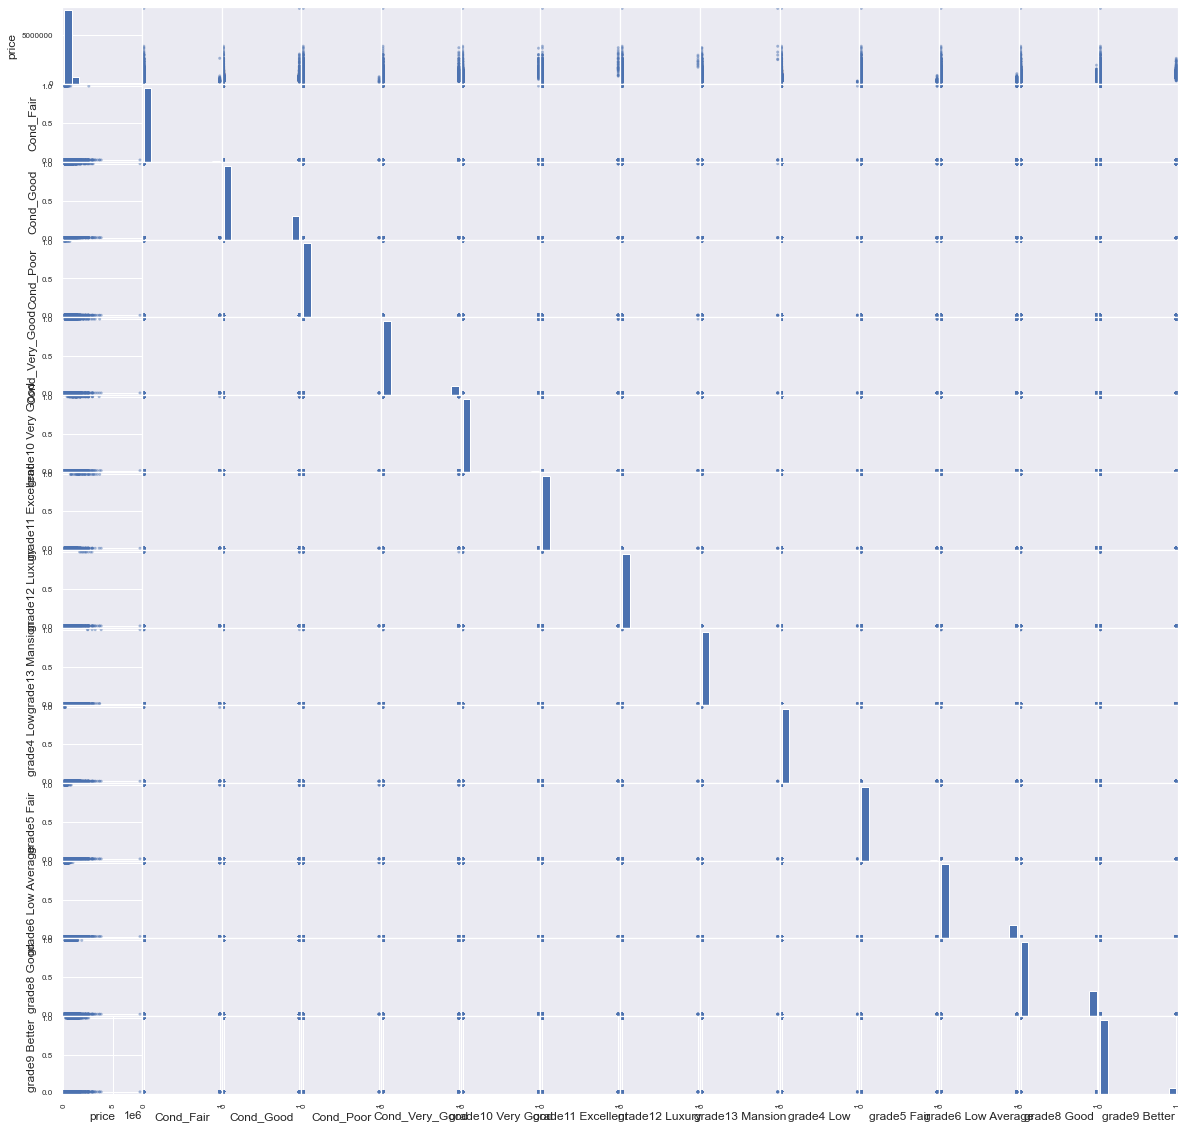

In [55]:
#full scatter plots of the variables, not much can be determined here.
pd.plotting.scatter_matrix(df_quality,figsize  = [20, 20]);
plt.show()

In [61]:
x_train_quality = df_quality.drop('price', axis = 1)
y_train_quality = df_quality['price']